In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import scipy.stats as stats
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, LabelEncoder, scale
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree, export_text
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, mean_squared_error
from sklearn.datasets import load_boston
sns.set()
import warnings
warnings.filterwarnings('ignore')

In [5]:
data = load_boston()

In [10]:
data

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [82]:
x,y = data.data, data.target

In [83]:
x = scale(x)
y = scale(y)

In [84]:
x_train,x_test,y_train,y_test = train_test_split(x ,y ,test_size = 0.3, random_state = 123)

In [85]:
tree = DecisionTreeRegressor(max_depth = 3)
tree.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=3)

In [86]:
y_train_pred = tree.predict(x_train)
y_test_pred = tree.predict(x_test)

In [87]:
from math import sqrt
train_rmse = sqrt(mean_squared_error(y_train,y_train_pred))
test_rmse = sqrt(mean_squared_error(y_test,y_test_pred))
print(f'Train RMSE : {train_rmse}')
print(f'Test RMSE : {test_rmse}')

Train RMSE : 0.4328714026731555
Test RMSE : 0.5591026524593591


In [88]:
mean_squared_error(y_test,y_test_pred)

0.3125957759870908

In [89]:
sqrt(0.21586729286897158)

0.4646152094679764

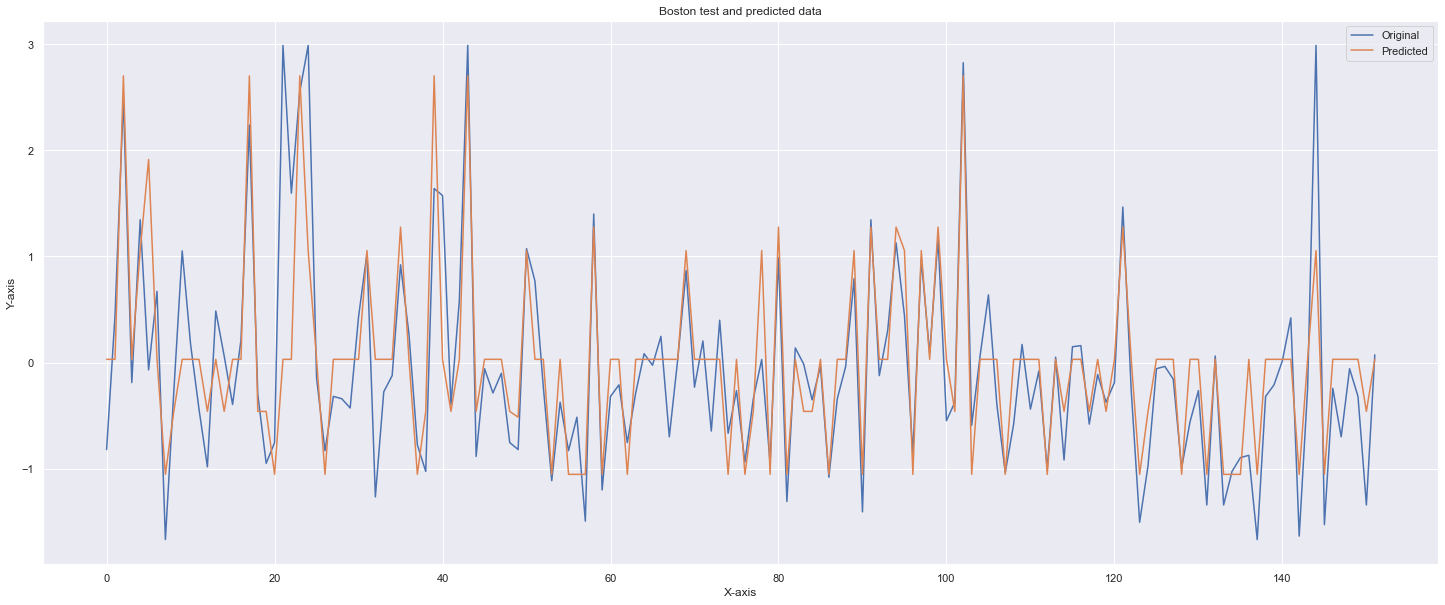

In [90]:
x_ax = range(len(y_test))
plt.figure(figsize = (25,10))
plt.plot(x_ax, y_test, label = 'Original')
plt.plot(x_ax, y_test_pred, label = 'Predicted')
plt.title('Boston test and predicted data')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend(loc = 'best')
plt.show()

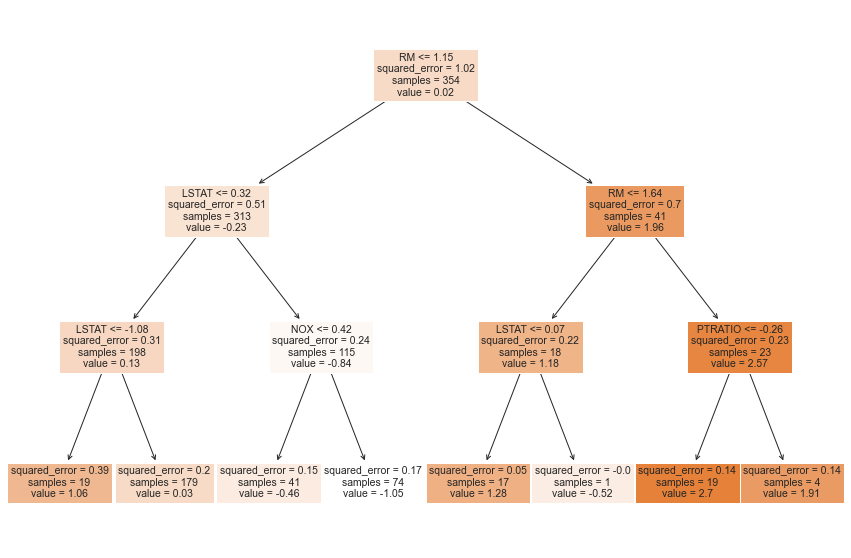

In [92]:
plt.figure(figsize = (15,10))
tree_fig = plot_tree(tree, feature_names = data.feature_names, filled = True, precision = 2)

In [93]:
path = tree.cost_complexity_pruning_path(x_train,y_train)
path

{'ccp_alphas': array([0.        , 0.00579289, 0.00856718, 0.02624539, 0.05100149,
        0.05496506, 0.19376344, 0.48848499]),
 'impurities': array([0.18737765, 0.19317054, 0.20173773, 0.22798312, 0.2789846 ,
        0.33394966, 0.5277131 , 1.01619809])}

In [94]:
alphas = path['ccp_alphas']
impurities = path['impurities']

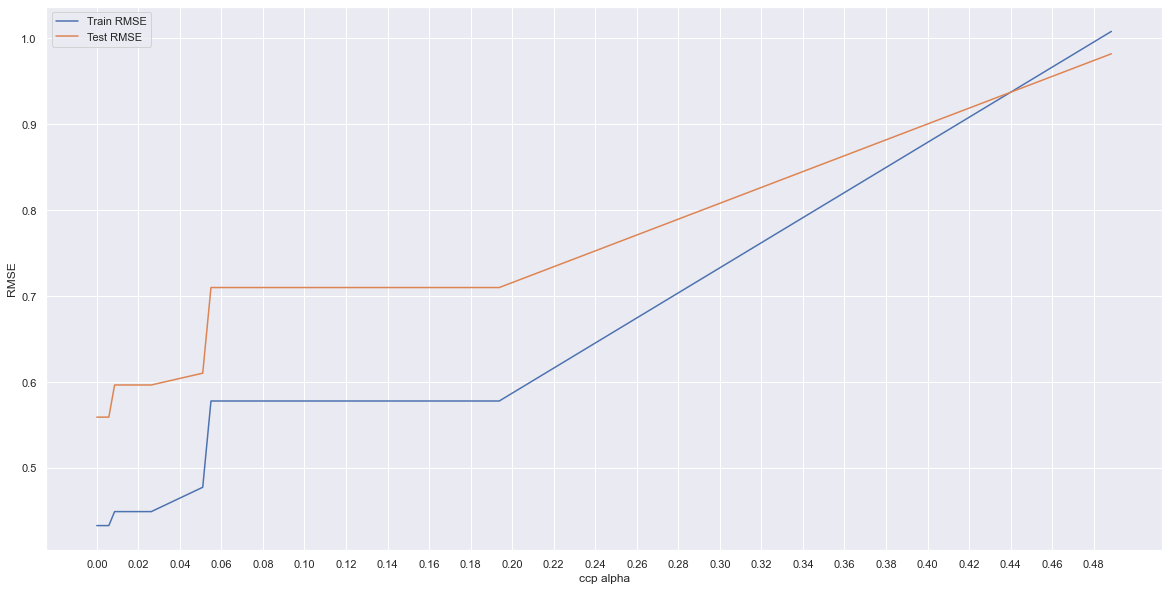

In [111]:
rmse_train , rmse_test = [], []

for i in alphas:
    new_tree = DecisionTreeRegressor(max_depth = 3, ccp_alpha = i)
    new_tree.fit(x_train,y_train)
    
    y_train_pred = new_tree.predict(x_train)
    y_test_pred = new_tree.predict(x_test)
    
    from math import sqrt
    rmse_train.append(sqrt(mean_squared_error(y_train,y_train_pred)))
    rmse_test.append(sqrt(mean_squared_error(y_test,y_test_pred)))
    
plt.figure(figsize = (20,10))
sns.lineplot(x = alphas, y = rmse_train, label = 'Train RMSE')
sns.lineplot(x = alphas, y = rmse_test, label = 'Test RMSE')
plt.xlabel('ccp alpha')
plt.ylabel('RMSE')
plt.xticks(ticks = np.arange(0.00, 0.50,0.02))
plt.show()

If Training RMSE is more and testing RMSE is less this leads to underfitting. <br>
If Training RMSE is less and testing RMSE is more this leads to overfitting. <br>
But the RMSE value should be lesser also.<br>
Choosing alpha value between 0.05 gives almost a good model with lesser RMSE.

In [112]:
final_tree = DecisionTreeRegressor(max_depth = 3, ccp_alpha = 0.05)
final_tree.fit(x_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.05, max_depth=3)

In [115]:
y_train_pred = final_tree.predict(x_train)
y_test_pred = final_tree.predict(x_test)

from math import sqrt
print(f'Train RMSE : {sqrt(mean_squared_error(y_train_pred,y_train)):1.2f}')
print(f'Test RMSE : {sqrt(mean_squared_error(y_test_pred,y_test)):1.2f}')

Train RMSE : 0.48
Test RMSE : 0.61


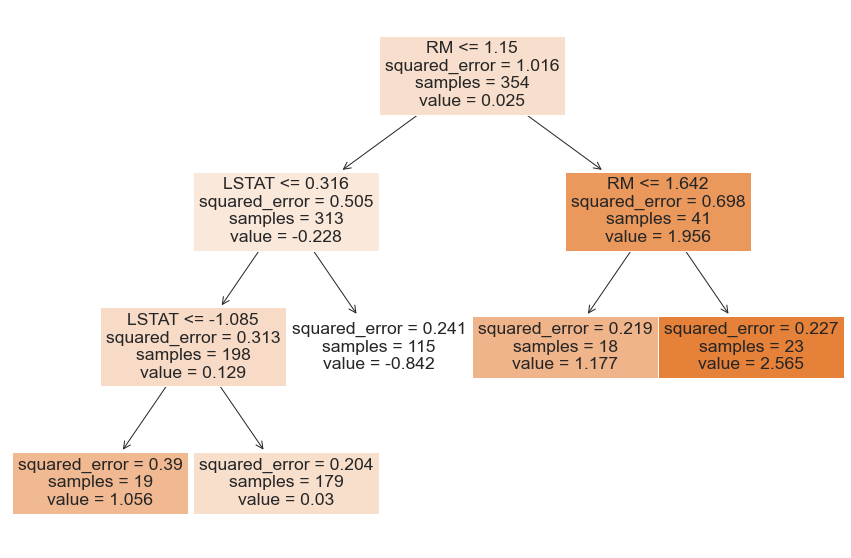

In [116]:
plt.figure(figsize = (15,10))
final_figure = plot_tree(final_tree, feature_names = data.feature_names, filled = True )

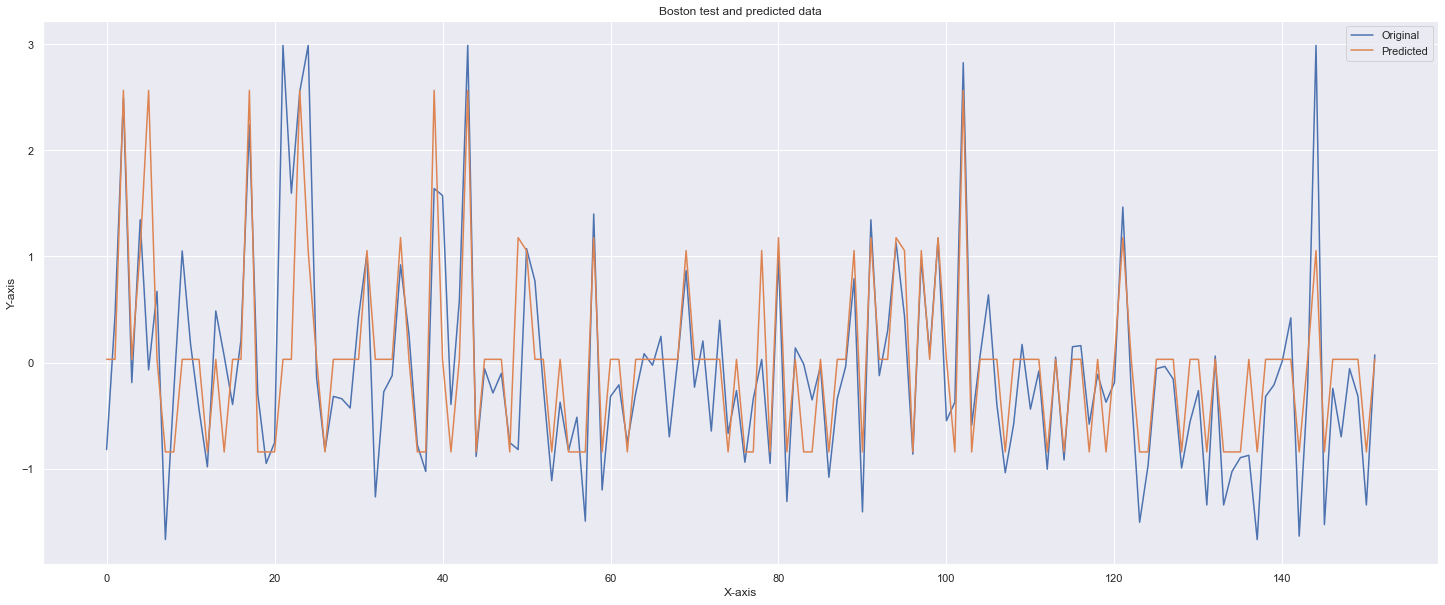

In [117]:
x_ax = range(len(y_test))
plt.figure(figsize = (25,10))
plt.plot(x_ax, y_test, label = 'Original')
plt.plot(x_ax, y_test_pred, label = 'Predicted')
plt.title('Boston test and predicted data')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend(loc = 'best')
plt.show()